In [1]:
rm(list=ls())

#########################################################################
### -- ANAL?TICA PREDICTIVA DE DATOS -- ## 
##################################################################################################################################################

In [2]:
########### 1) LIBRERIAS A UTILIZAR ################# 
source("./ins_paquetes.R")
ins_paquetes('neuralnet', 'randomForest')

Warning message:
"package 'neuralnet' was built under R version 3.6.3"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.



Bellow Packages Successfully Installed:

   neuralnet randomForest 
        TRUE         TRUE 


In [3]:
library(ggplot2)
library(gee)
library(leaps)
library(dplyr)
library(caret)
library(pROC)
library(MLmetrics)
library(neuralnet)
library(randomForest)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin

Warning message:
"package 'gee' was built under R version 3.6.3"Warning message:
"package 'leaps' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following object is masked from 'package:randomForest':

    combine

The following object is masked from 'package:neuralnet':

    compute

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: lattice
Warning message:
"package 'pROC' was built under R version 3.6.3"Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:sta

In [4]:
########### 2) DATA A UTILIZAR ################# 

data <- read.csv("./datasets/PimaIndiansDiabetes.csv")

In [5]:
########### 3) TRATAMIENTO DE LA DATA ################# 

## en primer lugar ver el analisis descriptivo de la data

resumen <- data.frame(mlr::summarizeColumns(data))
resumen
write.csv(resumen,"tabla_resumen.csv")

name,type,na,mean,disp,median,mad,min,max,nlevs
pregnant,integer,0,3.3010204,3.2114245,2.0000,1.4826000,0.000,17.00,0
glucose,integer,0,122.6275510,30.8607806,119.0000,31.1346000,56.000,198.00,0
pressure,integer,0,70.6632653,12.4960916,70.0000,11.8608000,24.000,110.00,0
triceps,integer,0,29.1454082,10.5164239,29.0000,11.8608000,7.000,63.00,0
insulin,integer,0,156.0561224,118.8416898,125.5000,80.8017000,14.000,846.00,0
mass,numeric,0,33.0862245,7.0276592,33.2000,6.6717000,18.200,67.10,0
pedigree,numeric,0,0.5230459,0.3454880,0.4495,0.2846592,0.085,2.42,0
age,integer,0,30.8647959,10.2007765,27.0000,7.4130000,21.000,81.00,0
diabetes,factor,0,NA,0.3316327,NA,NA,130.000,262.00,2


In [6]:
########### 4) VARIABLES DEL MODELO ################# 

## variables del modelo ##

data$diabetes <- ifelse(data$diabetes=="pos",1,0)
data$diabetes <- as.factor(data$diabetes)

In [7]:
########### 4) PARTICION MUESTRAL #################  

set.seed(123)
training.samples <- data$diabetes %>% 
  createDataPartition(p = 0.7, list = FALSE)
train.data  <- data[training.samples, ]
test.data <- data[-training.samples, ]

In [8]:
########### 4) MODELADO ################# 

# modelo 1.- Redes Neuronales

# -- train -- #
data.train.2 <- train.data
x <- data.train.2 %>% select(-diabetes)
y <- data.train.2 %>% select(diabetes)

In [9]:
# -- estandarizando -- #

x <- scale(x)
data.train.2 <- cbind(x,y)

# -- test -- #
data.test.2 <- test.data
x <- data.test.2 %>% select(-diabetes)
y <- data.test.2 %>% select(diabetes)

In [10]:
# -- estandarizando -- #

x <- scale(x)
data.test.2 <- cbind(x,y)

In [11]:
## Modelado

formula = diabetes~
pregnant+
glucose+
pressure+
triceps+
  insulin+
   mass+
pedigree+
    age

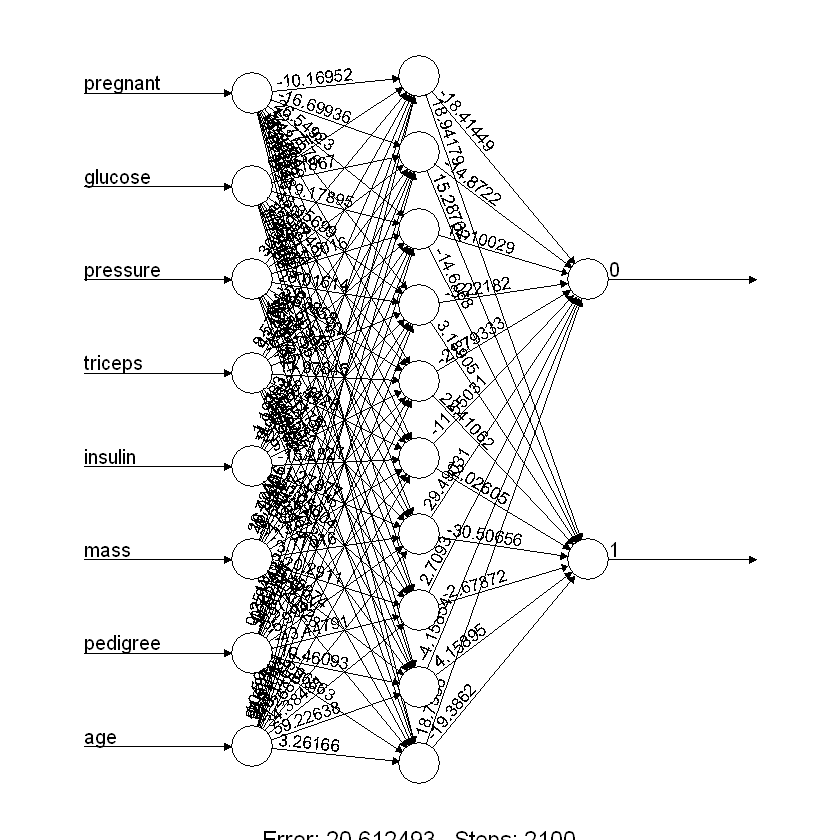

In [12]:
# ce entropia cruzada para clasificaicon
# sse minimos cuadrados para regresion
# threshold tasa de aprendizaje
# stepmax cantidad de iteraciones para encontrar los pesos
modelo_red <- neuralnet(formula,data=data.train.2, 
                        hidden=c(10), linear.output=FALSE, 
                        threshold=0.05 , learningrate=0.1, err.fct = "ce", 
                        act.fct = 'logistic',stepmax = 2e+05,algorithm="rprop+")
plot(modelo_red,rep="best", intercept=0)


In [13]:
modelo_red$result.matrix
plot(modelo_red)

error,20.6124934
reached.threshold,0.0452523
steps,2100.0000000
Intercept.to.1layhid1,6.0114155
pregnant.to.1layhid1,-10.1695161
glucose.to.1layhid1,6.1531528
pressure.to.1layhid1,30.4511997
triceps.to.1layhid1,8.5768832
insulin.to.1layhid1,-1.1973335
mass.to.1layhid1,20.7244690
pedigree.to.1layhid1,0.2513737


In [14]:
modelo_red_B <- neuralnet(formula,data=data.train.2, 
                        hidden=c(10,5), linear.output=FALSE, 
                        threshold=0.05 ,err.fct = "sse", 
                        act.fct = "logistic",stepmax = 2e+05)

In [15]:
data.test.2 <- data.test.2 %>% select (
  pregnant,
    glucose,
    pressure,
    triceps,
    insulin,
    mass,
    pedigree,
    age
)

In [21]:
proba1 <- predict(modelo_red, newdata=data.test.2)#,type="prob")
proba1 <- round(data.frame(proba1),0)
proba1

,X1,X2
8,1,0
10,1,0
12,0,1
20,0,1
25,0,1
29,1,0
32,1,0
33,0,1
34,1,0
38,1,0


In [22]:
proba1 <- proba1[,2]
PRED <- as.factor(proba1)

In [23]:
############################
test_proba <- neuralnet::compute(modelo_red, data.test.2)
test_proba[["net.result"]]

proba1 <- round(data.frame(test_proba$net.result),5)
proba1 <- round(data.frame(test_proba$net.result),0)

proba1$test_proba.net.result

8,6.887305e-01,3.129088e-01
10,8.821936e-01,1.187698e-01
12,3.476962e-01,6.618858e-01
20,5.602619e-08,1.000000e+00
25,5.558776e-08,1.000000e+00
29,9.999986e-01,1.119404e-06
32,1.000000e+00,2.723898e-13
33,1.657896e-05,9.999886e-01
34,9.999999e-01,4.542270e-08
38,9.998481e-01,9.598445e-05
43,1.000000e+00,3.153077e-19


NULL

In [24]:
############################



# Calcular los valores predichos
test.data$diabetes <- as.factor(test.data$diabetes)
test.data$diabetes

[1] 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1
 [38] 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 [75] 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0
[112] 0 0 0 0 1 0
Levels: 0 1

Mayor valor de GINI --> No esta tan bien

In [27]:
# Indicadores use Gini function
#gini.index <- MLmetrics::Gini(y_pred = data$COLUMNNAME, y_true = data$COLNAME2)

GINI_1    <- MLmetrics::Gini(PRED,as.numeric(as.character(test.data$diabetes)))
GINI_1

[1] 0.5345168

In [28]:
ks_1      <- KS_Stat(proba1,as.numeric(as.character(test.data$diabetes)))
ks_1

ERROR: Error in `[.data.frame`(x, order(x, na.last = na.last, decreasing = decreasing)): undefined columns selected


In [29]:
LogLoss_1 <- LogLoss(proba1,as.numeric(as.character(test.data$diabetes)))
LogLoss_1

Warning message in mean.default(y_true * log(y_pred) + (1 - y_true) * log(1 - y_pred)):
"argument is not numeric or logical: returning NA"

[1] NA

In [30]:
# Calcular la matriz de confusion
library(caret)
tabla <- confusionMatrix(PRED,test.data$diabetes,positive = "1")
tabla

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 62 13
         1 16 26
                                          
               Accuracy : 0.7521          
                 95% CI : (0.6638, 0.8273)
    No Information Rate : 0.6667          
    P-Value [Acc > NIR] : 0.0290          
                                          
                  Kappa : 0.4528          
                                          
 Mcnemar's Test P-Value : 0.7103          
                                          
            Sensitivity : 0.6667          
            Specificity : 0.7949          
         Pos Pred Value : 0.6190          
         Neg Pred Value : 0.8267          
             Prevalence : 0.3333          
         Detection Rate : 0.2222          
   Detection Prevalence : 0.3590          
      Balanced Accuracy : 0.7308          
                                          
       'Positive' Class : 1               
                                    

In [31]:
# sensibilidad
Sensitivity1 <- as.numeric(tabla$byClass[1])
Sensitivity1

[1] 0.6666667

In [32]:
# Precision
Accuracy1 <- tabla$overall[1]
Accuracy1

Accuracy 
0.7521368

In [34]:
# modelo 2.- Random Forest

train.data$diabetes <- as.factor(train.data$diabetes)

modelo2 <- randomForest( diabetes~.,data = train.data,   # Datos a entrenar 
                         ntree=150,           # Numero de arboles
                         mtry = 3,            # Cantidad de variables
                         importance = TRUE,   # Determina la importancia de las variables
                         replace=T)


proba2 <- predict(modelo2, newdata=test.data,type="prob")
proba2 <- proba2[,2]

In [35]:
# Indicadores

GINI_2    <- Gini(   proba2,as.numeric(as.character(test.data$diabetes)))
ks_2      <- KS_Stat(proba2,as.numeric(as.character(test.data$diabetes)))
LogLoss_2 <- LogLoss(proba2,as.numeric(as.character(test.data$diabetes)))

In [36]:
# Calcular los valores predichos
PRED <- predict(modelo2, newdata=test.data,type="class")
PRED <- as.factor(PRED)

In [37]:
# Calcular la matriz de confusion
library(caret)
tabla <- confusionMatrix(PRED,test.data$diabetes,positive = "1")

In [38]:
# sensibilidad
Sensitivity2 <- as.numeric(tabla$byClass[1])

In [39]:
# Precision
Accuracy2 <- tabla$overall[1]

In [40]:
## --Tabla De Resultados ####

GINI <- rbind(GINI_1,
              GINI_2
)
KS <- rbind(ks_1,
            ks_2
)
LogLoss <- rbind(LogLoss_1,
                 LogLoss_2
)
Accuracy=rbind(Accuracy1,
               Accuracy2
)
SENSIBILIDAD=rbind(Sensitivity1,
                   Sensitivity2
)

ERROR: Error in rbind(ks_1, ks_2): objeto 'ks_1' no encontrado


In [41]:
resultado <- data.frame(GINI,KS,LogLoss,Accuracy,SENSIBILIDAD)
rownames(resultado)=c('Redes Neuronales','RandomForest')
resultado <- round(resultado,2)
resultado

ERROR: Error in data.frame(GINI, KS, LogLoss, Accuracy, SENSIBILIDAD): objeto 'KS' no encontrado


In [42]:
## Resultado Ordenado #####

# ordenamos por el Indicador que deseamos, quiza Accuracy en forma decreciente
Resultado_ordenado <- resultado[order(-SENSIBILIDAD),] 
Resultado_ordenado

ERROR: Error in eval(expr, envir, enclos): objeto 'resultado' no encontrado
